In [1]:
#Libraries 
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.cluster import KMeans
from gap_statistic import OptimalK
from sklearn.cluster import KMeans

In [2]:
df = pd.read_csv(r"C:\Users\saksh\OneDrive\Documents\intellipant\Capstone project\Customer segementation\OnlineRetail (3).csv", encoding= 'unicode_escape')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   InvoiceNo    541909 non-null  object 
 1   StockCode    541909 non-null  object 
 2   Description  540455 non-null  object 
 3   Quantity     541909 non-null  int64  
 4   InvoiceDate  541909 non-null  object 
 5   UnitPrice    541909 non-null  float64
 6   CustomerID   406829 non-null  float64
 7   Country      541909 non-null  object 
dtypes: float64(2), int64(1), object(5)
memory usage: 33.1+ MB


In [4]:
df.describe()

,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [5]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [6]:
# as the customer ID is required to segment data so null values need to be dropped for better results
df= df.dropna(subset=['CustomerID'])

In [7]:
df = df.drop_duplicates(keep='first')
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France


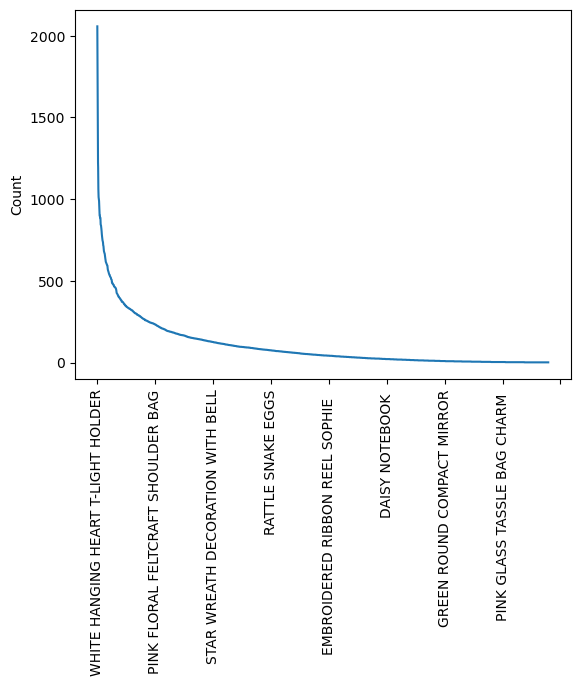

In [8]:
#most selling product
df['Description'].value_counts().plot()
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

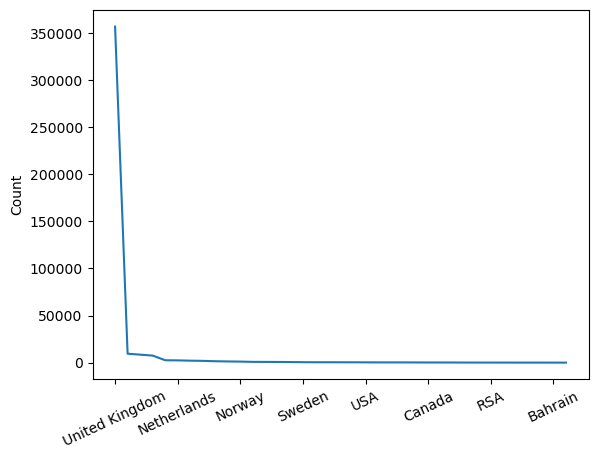

In [9]:
#Country wise sales 
df['Country'].value_counts().plot()
plt.xticks(rotation=25)
plt.ylabel('Count')
plt.show()

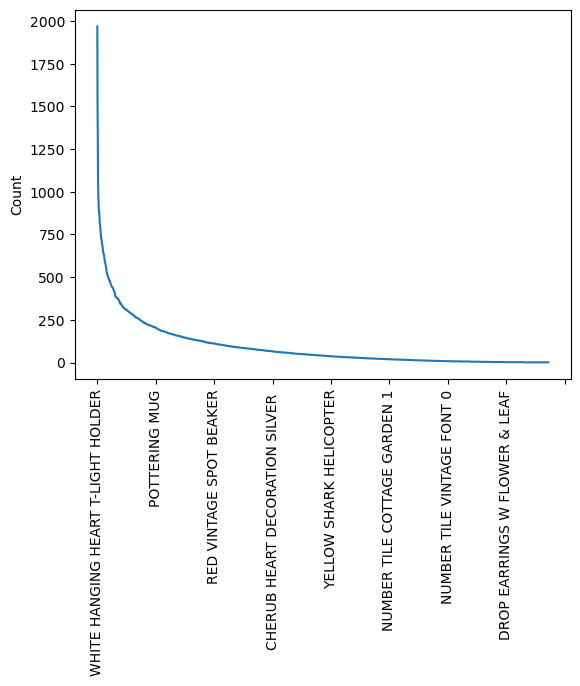

In [10]:
#Product UK is purchasing the most 
UK = df[(df['Country'] == 'United Kingdom')]
UK['Description'].value_counts().plot()
plt.xticks(rotation=90)
plt.ylabel('Count')
plt.show()

In [11]:
#Let check the max and min purchase done by a customer
df['Purchase Done'] =df['Quantity']*df['UnitPrice']
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase Done
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,12/1/2010 8:26,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,12/1/2010 8:26,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,12/1/2010 8:26,3.39,17850.0,United Kingdom,20.34
...,...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,12/9/2011 12:50,0.85,12680.0,France,10.20
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,12/9/2011 12:50,2.10,12680.0,France,12.60
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,12/9/2011 12:50,4.15,12680.0,France,16.60
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,12/9/2011 12:50,4.15,12680.0,France,16.60


In [12]:
#max quantity is purshased in one go
df[(df['Purchase Done']==df['Purchase Done'].max())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase Done
540421,581483,23843,"PAPER CRAFT , LITTLE BIRDIE",80995,12/9/2011 9:15,2.08,16446.0,United Kingdom,168469.6


In [13]:
#min quantity is purshased in one go
df[(df['Purchase Done']==df['Purchase Done'].min())]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,Purchase Done
540422,C581484,23843,"PAPER CRAFT , LITTLE BIRDIE",-80995,12/9/2011 9:27,2.08,16446.0,United Kingdom,-168469.6


As we can see,the dataset includes the value of returned item also.Let get the total yearly sales done by all country stores in 2010 and 2011 

In [14]:
df['InvoiceDate'] = pd.to_datetime(df['InvoiceDate'],dayfirst=True)

In [15]:
df_2010 = df[(df['InvoiceDate'] > '1/1/2010') & (df['InvoiceDate'] < '31/12/2010 23:59')]
df_2011 = df[(df['InvoiceDate'] > '1/1/2011') & (df['InvoiceDate'] < '31/12/2011 23:59')]


In [16]:
canc_2010 = df_2010[(df_2010['InvoiceNo'].str.startswith("C"))]
pur_2010 = df_2010[(df_2010['InvoiceNo'].str.startswith("5"))]
total_2010 = (pur_2010['Purchase Done'].sum())+(canc_2010['Purchase Done'].sum())
total_2010

552372.86

In [17]:
#purchase done is more in 2011 than 2010
canc_2011 = df_2011[(df_2011['InvoiceNo'].str.startswith("C"))]
pur_2011 = df_2011[(df_2011['InvoiceNo'].str.startswith("5"))]
total_2011 = (pur_2011['Purchase Done'].sum())+(canc_2011['Purchase Done'].sum())
total_2011

7726146.563999999

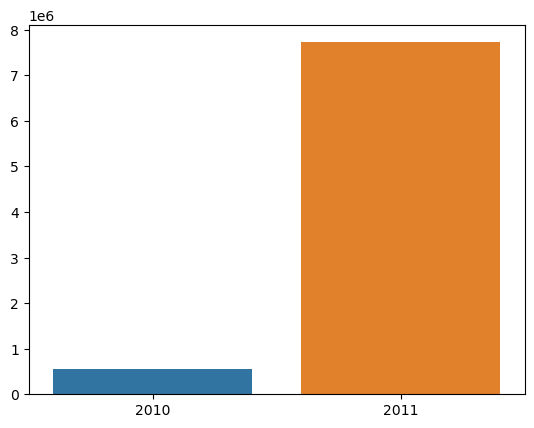

In [18]:
sns.barplot(x=['2010', '2011'], y=[total_2010, total_2011])
plt.show()

In [19]:
data = df.groupby(['CustomerID']).sum()
data = data.reset_index()
data

C:\Users\saksh\AppData\Local\Temp\ipykernel_7184\456685100.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  data = df.groupby(['CustomerID']).sum()


,CustomerID,Quantity,UnitPrice,Purchase Done
0,12346.0,0,2.08,0.00
1,12347.0,2458,481.21,4310.00
2,12348.0,2341,178.71,1797.24
3,12349.0,631,605.10,1757.55
4,12350.0,197,65.30,334.40
...,...,...,...,...
4367,18280.0,45,47.65,180.60
4368,18281.0,54,39.36,80.82
4369,18282.0,98,62.68,176.60
4370,18283.0,1357,1174.33,2045.53


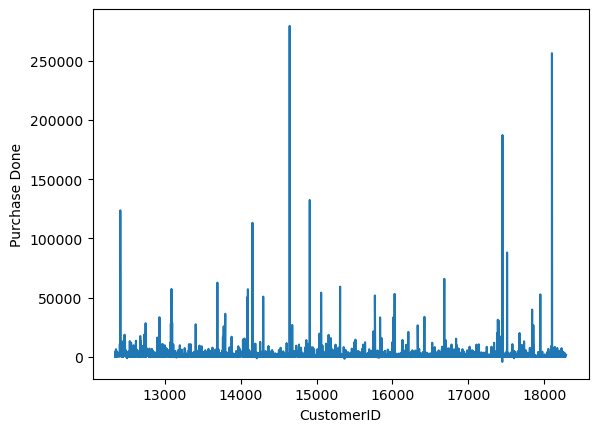

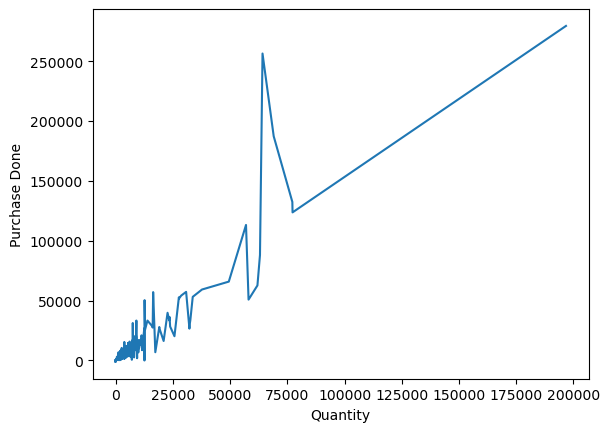

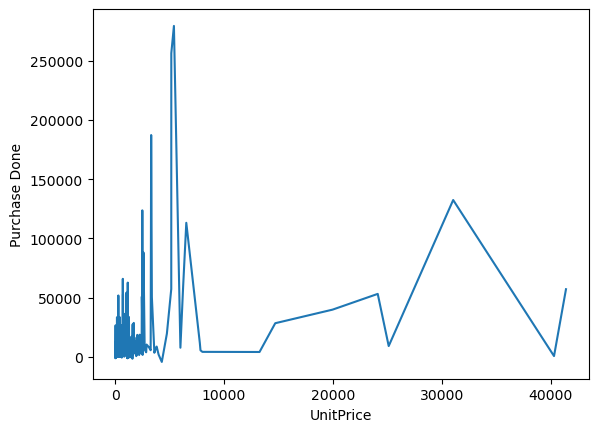

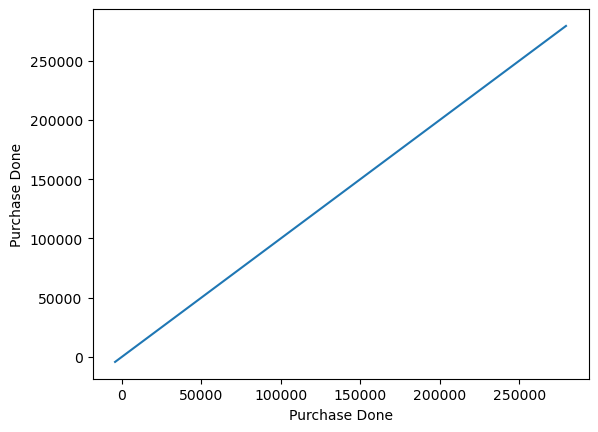

In [20]:
col = list(data.columns)
for i in col:
    sns.lineplot(data= data, x=data[i], y=data['Purchase Done'])
    plt.show()

In [21]:
from sklearn.preprocessing import LabelEncoder
encode = LabelEncoder()
df['Description'] = encode.fit_transform(df['Description'])


In [22]:

Description_group = df.groupby(['Description'])['Quantity','Purchase Done'].sum()
Description_group = Description_group.reset_index()
Description_group


C:\Users\saksh\AppData\Local\Temp\ipykernel_7184\607489635.py:1: FutureWarning: Indexing with multiple keys (implicitly converted to a tuple of keys) will be deprecated, use a list instead.
  Description_group = df.groupby(['Description'])['Quantity','Purchase Done'].sum()


,Description,Quantity,Purchase Done
0,0,138,265.66
1,1,1883,2269.75
2,2,2387,2745.75
3,3,359,1449.85
4,4,1,4.15
...,...,...,...
3891,3891,4850,3843.46
3892,3892,5,92.75
3893,3893,2594,2165.90
3894,3894,25,156.80


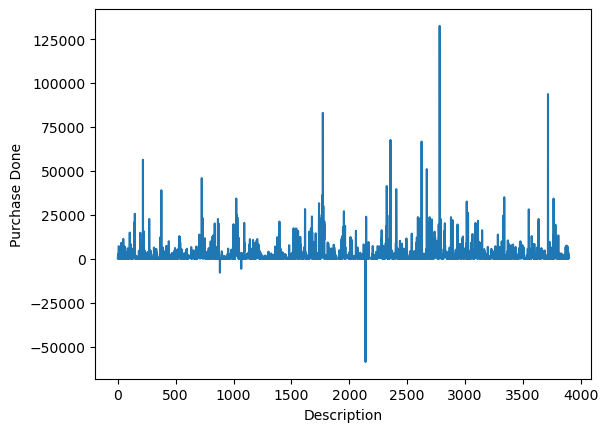

In [23]:
sns.lineplot(data= Description_group, x=Description_group['Description'], y=Description_group['Purchase Done'])
plt.show()


In [24]:
Cluster_1 = Description_group.iloc[:,[0,2]].values
Cluster_1

array([[0.00000e+00, 2.65660e+02],
       [1.00000e+00, 2.26975e+03],
       [2.00000e+00, 2.74575e+03],
       ...,
       [3.89300e+03, 2.16590e+03],
       [3.89400e+03, 1.56800e+02],
       [3.89500e+03, 2.53240e+02]])

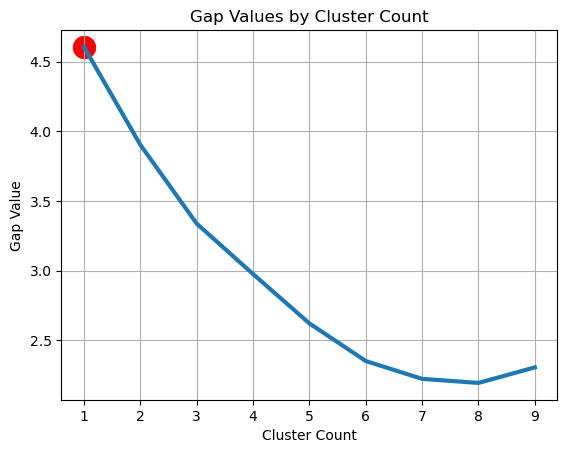

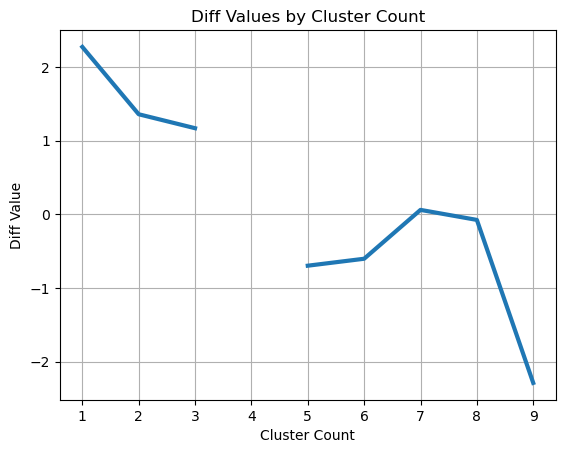

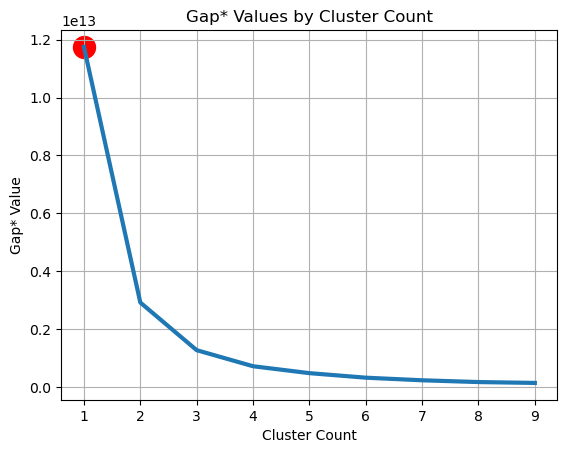

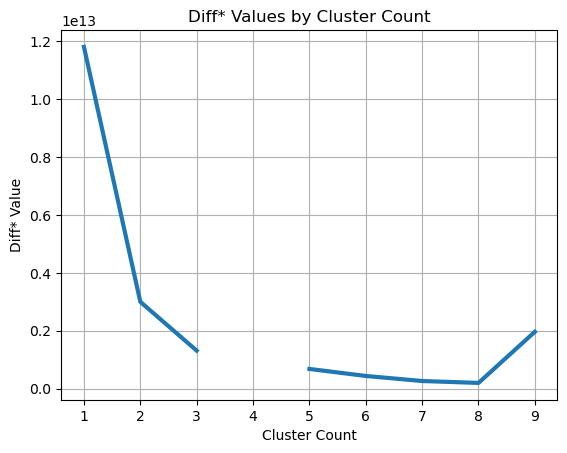

In [25]:
optimalK = OptimalK(parallel_backend='multiprocessing')
n_clusters = optimalK(Cluster_1, cluster_array=np.arange(1, 10))

optimalK.plot_results()

In [26]:

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(Cluster_1)

    wcss.append(kmeans.inertia_)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\clust

In [27]:
wcss

[118659028704.44684,
 60020803852.82796,
 34815511547.4252,
 23017436016.352077,
 18768266731.231297,
 15561405291.904747,
 12039177274.65454,
 9201522421.155888,
 7154400983.869972,
 5979501283.405113]

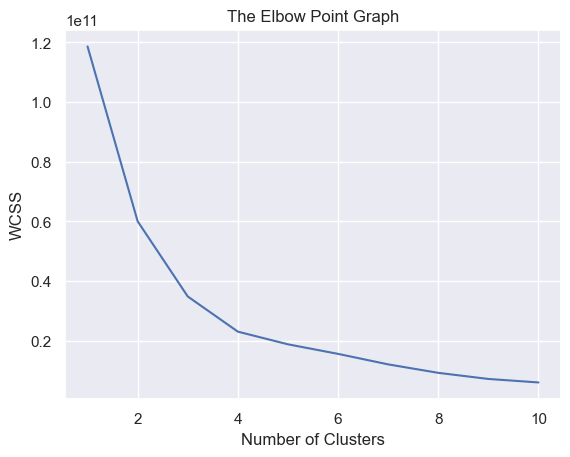

In [28]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [29]:
kmeans = KMeans(n_clusters=4, init='k-means++', random_state=0)


Y = kmeans.fit_predict(Cluster_1)

means = kmeans.cluster_centers_

print(Y)
print(means)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[3 3 3 ... 3 3 3]
[[ 2019.97555556  7136.75495556]
 [ 2243.83333333 83343.76666667]
 [ 1936.72631579 22201.52810526]
 [ 1937.52436472   734.75991749]]


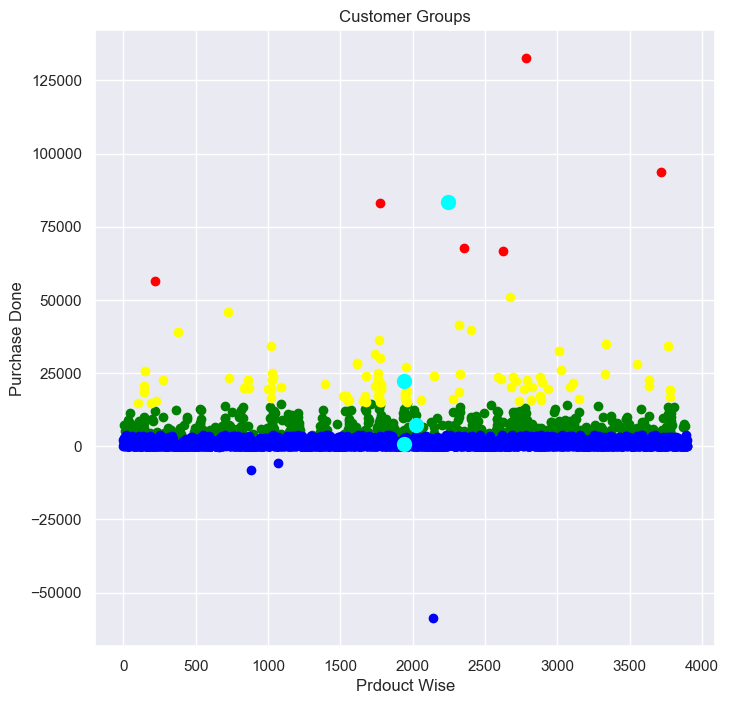

In [30]:

plt.figure(figsize=(8,8))
plt.scatter(Cluster_1[Y==0,0], Cluster_1[Y==0,1],  c='green', label='Cluster 1')
plt.scatter(Cluster_1[Y==1,0], Cluster_1[Y==1,1], c='red', label='Cluster 2')
plt.scatter(Cluster_1[Y==2,0], Cluster_1[Y==2,1], c='yellow', label='Cluster 3')
plt.scatter(Cluster_1[Y==3,0], Cluster_1[Y==3,1], c='blue', label='Cluster 4')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('Prdouct Wise')
plt.ylabel('Purchase Done')
plt.show()

In [31]:
Cluster_2 = data.iloc[:,[0,3]].values
Cluster_2

array([[12346.  ,     0.  ],
       [12347.  ,  4310.  ],
       [12348.  ,  1797.24],
       ...,
       [18282.  ,   176.6 ],
       [18283.  ,  2045.53],
       [18287.  ,  1837.28]])

In [32]:

wcss = []

for i in range(1,11):
    kmeans = KMeans(n_clusters=i, init='k-means++', random_state=0)
    kmeans.fit(Cluster_2)

    wcss.append(kmeans.inertia_)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(
C:\Users\saksh\anaconda3\lib\site-packages\sklearn\clust

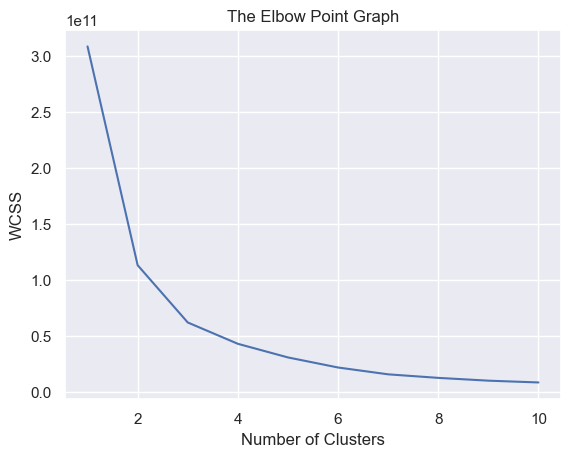

In [33]:
sns.set()
plt.plot(range(1,11), wcss)
plt.title('The Elbow Point Graph')
plt.xlabel('Number of Clusters')
plt.ylabel('WCSS')
plt.show()

In [34]:
kmeans = KMeans(n_clusters=3, init='k-means++', random_state=0)

# return a label for each data point based on their cluster
Y = kmeans.fit_predict(Cluster_2)

means = kmeans.cluster_centers_

print(Y)
print(means)

C:\Users\saksh\anaconda3\lib\site-packages\sklearn\cluster\_kmeans.py:870: FutureWarning: The default value of `n_init` will change from 10 to 'auto' in 1.4. Set the value of `n_init` explicitly to suppress the warning
  warnings.warn(


[0 0 0 ... 0 0 0]
[[ 15298.50345145   1428.98699816]
 [ 16732.66666667 241083.22666667]
 [ 15334.65217391  58473.57608696]]


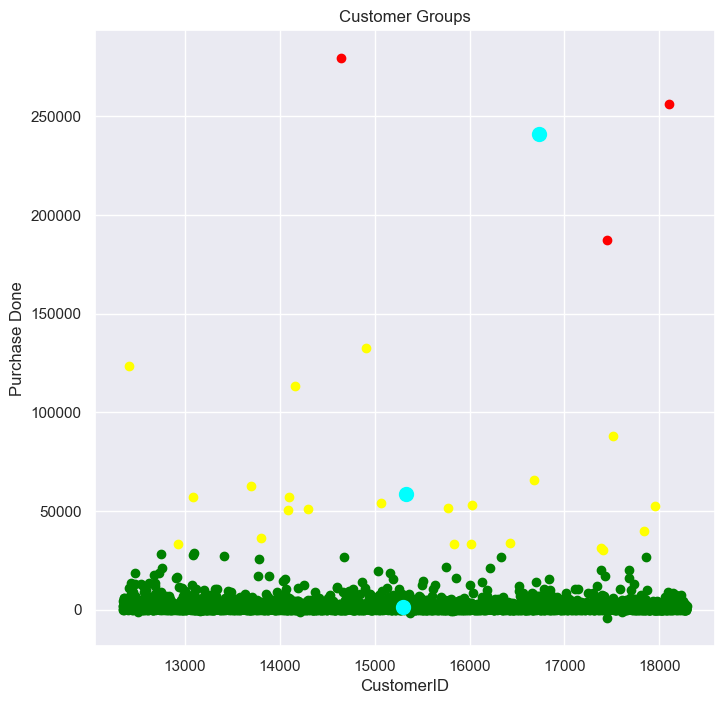

In [35]:

plt.figure(figsize=(8,8))
plt.scatter(Cluster_2[Y==0,0], Cluster_2[Y==0,1],  c='green', label='Cluster 1')
plt.scatter(Cluster_2[Y==1,0], Cluster_2[Y==1,1], c='red', label='Cluster 2')
plt.scatter(Cluster_2[Y==2,0], Cluster_2[Y==2,1], c='yellow', label='Cluster 3')

# plot the centroids
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], s=100, c='cyan', label='Centroids')

plt.title('Customer Groups')
plt.xlabel('CustomerID')
plt.ylabel('Purchase Done')
plt.show()